<a href="https://colab.research.google.com/github/Manoj-S375/PRODIGY_ML_02/blob/main/Customer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading and Viewing of Dataset**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML Dataset Intern/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0, 0.5, 'Spending Score')

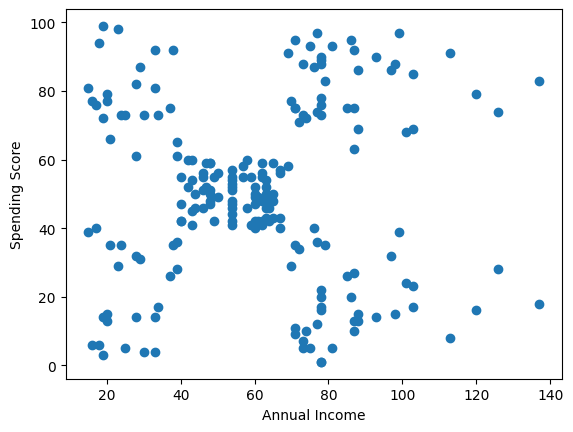

In [ ]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

In [ ]:
user_range = (1,10)
scaler = MinMaxScaler(feature_range=user_range)
income = np.array(df["Annual Income (k$)"]).reshape(-1,1)
score = np.array(df["Spending Score (1-100)"]).reshape(-1,1)
df_income = scaler.fit_transform(income)
df_score = scaler.fit_transform(score)

In [ ]:
#df["Annual Income (k$)"],df["Spending Score (1-100)"] = df_income,df_score

# **Predicting the k value**

In [ ]:
sse = []
data = pd.DataFrame(df[["Annual Income (k$)","Spending Score (1-100)"]])
for i in range(1,11):
  km = KMeans(n_clusters=i,n_init = 20)
  km.fit(data)
  sse.append(km.inertia_)

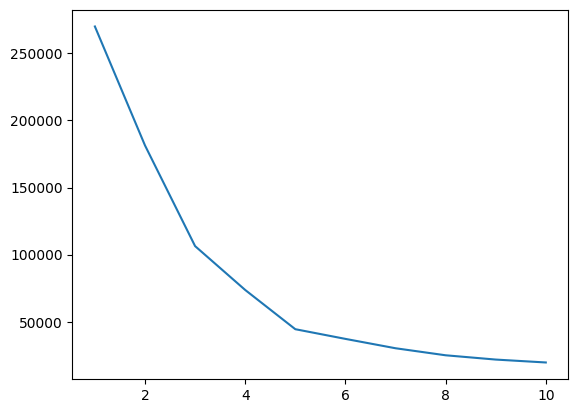

In [ ]:
x = [i for i in range(1,11)]
plt.plot(x,sse)

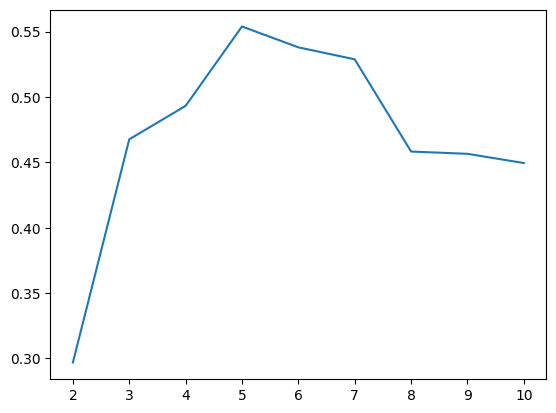

In [ ]:
silhouette = []
for j in range(2,11):
  km = KMeans(n_clusters=j,n_init = 20)
  km.fit(data)
  silhouette.append(silhouette_score(data, km.labels_))
x = [i for i in range(2,11)]
plt.plot(x,silhouette)

# **Training the k-means model**

In [ ]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
km = KMeans(n_clusters=5,n_init = 15)
clusters = km.fit_predict(data)
clusters

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [ ]:
data["c_inx"] = clusters
data

,Annual Income (k$),Spending Score (1-100),c_inx
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,0
196,126,28,2
197,126,74,0
198,137,18,2


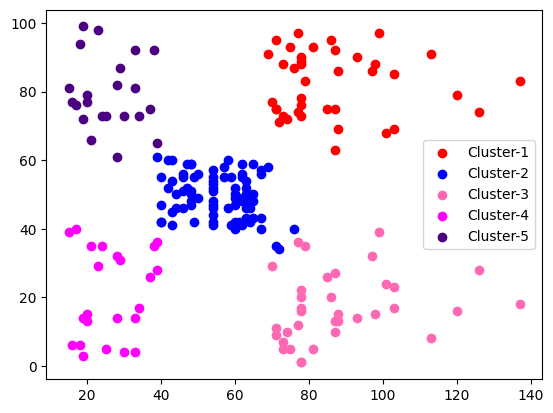

In [ ]:
c1 = data[data["c_inx"] == 0]
c2 = data[data["c_inx"] == 1]
c3 = data[data["c_inx"] == 2]
c4 = data[data["c_inx"] == 3]
c5 = data[data["c_inx"] == 4]
plt.scatter(c1["Annual Income (k$)"],c1["Spending Score (1-100)"],color="red",label="Cluster-1")
plt.scatter(c2["Annual Income (k$)"],c2["Spending Score (1-100)"],color="blue",label="Cluster-2")
plt.scatter(c3["Annual Income (k$)"],c3["Spending Score (1-100)"],color="hotpink",label="Cluster-3")
plt.scatter(c4["Annual Income (k$)"],c4["Spending Score (1-100)"],color="magenta",label="Cluster-4")
plt.scatter(c5["Annual Income (k$)"],c5["Spending Score (1-100)"],color="indigo",label="Cluster-5")
plt.legend()

# **Testing the model**

In [ ]:
inp = pd.DataFrame({"Annual Income (k$)":[120],"Spending Score (1-100)":[70]})
inp_x = np.array(inp["Annual Income (k$)"]).reshape(-1,1)
print(inp_x)
inp_y = np.array(inp["Spending Score (1-100)"]).reshape(-1,1)
#ina = scaler.fit_transform(inp_x)
#inb = scaler.fit_transform(inp_y)
#inp["Annual Income (k$)"] = ina
#inp["Spending Score (1-100)"] = inb
ans = km.predict(inp)
print("Cluster:",ans[0]+1)
print(inp)

[[120]]
Cluster: 1
   Annual Income (k$)  Spending Score (1-100)
0                 120                      70
